# Project
## 분석 목표 - 한국복지 패널
* 분석 내용(한국인의 삶을 파악하라)
1) 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
2) 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
3) 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많이 받을까?
4) 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
5) 직업별 월급 차이 - 어떤 직업이 월급 가장 많이 받을까?
6) 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
7) 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?
8) 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

### 설치 및 라이브러리 설정

In [2]:
# 통계분석에 필요한 라이브러리 설치 (SPSS, SAS)
!pip install pyreadstat

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns      

import matplotlib.pyplot as plt   
import matplotlib as mpl          
mpl.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

import scipy.stats as stats

### 데이터 전처리
* https://www.koweps.re.kr:442/data/data/list.do 
* 데이터 불러오기 및 검토
* 원하는 컬럼 추출 및 컬럼명 변경

In [139]:
data=pd.read_spss('./Data/pandas/project/Koweps_hpwc14_2019_beta2.sav')
data.shape    #  6,331가구 / 14,418명의 정보 

(14418, 830)

In [141]:
data.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [142]:
# csv 파일로 저장 
# data.to_csv('./Data/pandas/project/Koweps_hpwc14_2019_beta2.csv', index=False)

In [143]:
# data.columns

In [144]:
# 원하는 컬럼 추출 
person=data[['h14_g3', 'h14_g4',  'h14_g10', 'h14_g11', 'p1402_8aq1', 'h14_eco9', 'h14_reg7']]
person.head()

,h14_g3,h14_g4,h14_g10,h14_g11,p1402_8aq1,h14_eco9,h14_reg7
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [145]:
person.info()                      # 각 특성의 타입 및 결측치 체크 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   h14_g3      14418 non-null  float64
 1   h14_g4      14418 non-null  float64
 2   h14_g10     14418 non-null  float64
 3   h14_g11     14418 non-null  float64
 4   p1402_8aq1  4534 non-null   float64
 5   h14_eco9    6878 non-null   float64
 6   h14_reg7    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [146]:
# 컬럼명 변경
person=person.rename(columns={'h14_g3':'성별',
                             'h14_g4':'태어난연도',
                             'h14_g10':'혼인상태',
                             'h14_g11':'종교',
                             'p1402_8aq1':'월급',
                             'h14_eco9':'직업코드',
                             'h14_reg7':'지역코드' })
person.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0


In [147]:
# csv 파일로 저장 - 추후 사용 
# person.to_csv('./Data/pandas/project/person.csv', index=False)

In [148]:
# 결측치
person.isna().sum()

성별          0
태어난연도       0
혼인상태        0
종교          0
월급       9884
직업코드     7540
지역코드        0
dtype: int64

In [149]:
# 기술 통계량
person.describe().T.astype(int)     # round(person.describe().T, 1)

,count,mean,std,min,25%,50%,75%,max
성별,14418,1,0,1,1,2,2,2
태어난연도,14418,1969,24,1907,1948,1968,1990,2018
혼인상태,14418,1,1,0,1,1,2,6
종교,14418,1,0,1,1,2,2,2
월급,4534,268,198,0,150,220,345,1892
직업코드,6878,587,264,111,313,611,873,1009
지역코드,14418,3,2,1,2,3,5,7


## 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까? 
* 분석에 활용할 변수(성별, 월급)를 전처리
  - 이상치, 결측치 정제
  - 변수값 다루기 편하게 수정 - 남(1)/여(2)
* 변수 간 관계 분석
  - 그래프 : X(성별/문자형), Y(월급/숫자형) - BarChar(성별월급평균)
  - 데이터 요약표 (성별 월급 평균표 만들기)
* 검증
  - X(문자형) / Y(숫자형) >> 정규성 검증 >> 등분산 검증 >> 2집단, 3집단 이상

### 성별 변수 검토 및 전처리
* 이상치, 결측치 체크
* 성별 값 수정 / 남(1), 여(1)

In [152]:
ex_one=person.copy()

In [153]:
# ex_one['성별'].info()

print("타입:", ex_one['성별'].dtypes)             # 타입
print("사이즈:", ex_one['성별'].size)             # 사이즈
print("결측치:", ex_one['성별'].isna().sum())     # 결측치

타입: float64
사이즈: 14418
결측치: 0


In [154]:
round(ex_one['성별'].describe(), 1)                 # 기술적 통계

count    14418.0
mean         1.5
std          0.5
min          1.0
25%          1.0
50%          2.0
75%          2.0
max          2.0
Name: 성별, dtype: float64

In [155]:
ex_one['성별'].value_counts()                    # 빈도수 확인 

성별
2.0    7913
1.0    6505
Name: count, dtype: int64

In [156]:
# 이상치 >> 결측 처리 >> 대체 또는 삭제
# 코드북 - 남(1), 여(2), 모름/무응답(9)
ex_one['성별']=np.where(ex_one['성별'] == 9, np.nan, ex_one['성별'])
ex_one['성별'].isna().sum()

0

In [157]:
ex_one['성별']=np.where(ex_one['성별']==1.0, '남', '여')            # 변수의 값을 다루기 편하게 수정
ex_one['성별'].value_counts()

성별
여    7913
남    6505
Name: count, dtype: int64

<Axes: xlabel='성별', ylabel='count'>

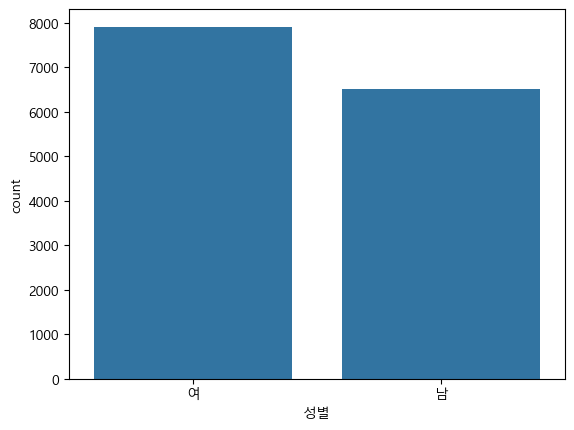

In [158]:
# 단일변수 - 범주형(문자형) 시각화  : countplot. pie
sns.countplot(data=ex_one, x='성별')

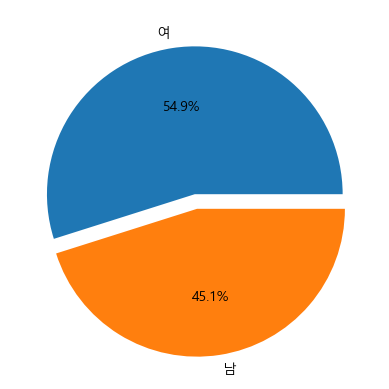

In [159]:
plt.pie(x=ex_one['성별'].value_counts(),
       labels=ex_one['성별'].value_counts().index,
        autopct='%.1f%%', explode=[0, 0.1])
plt.show()

### 월급 변수 검토 및 전처리
* 이상치, 결측치 체크

In [161]:
# ex_one['월급'].info()

print("타입:", ex_one['월급'].dtypes)             # 타입
print("사이즈:", ex_one['월급'].size)             # 사이즈
print("결측치:", ex_one['월급'].isna().sum())     # 결측치 - 결측치 제거해야 됨

타입: float64
사이즈: 14418
결측치: 9884


In [162]:
ex_one['월급'].describe().astype(int)           # 요약통계량(이상치 확인) / 월 0 ~ 1,892

count    4534
mean      268
std       198
min         0
25%       150
50%       220
75%       345
max      1892
Name: 월급, dtype: int32

In [163]:
a=ex_one[ex_one['월급']== 9999]
a.shape

a=ex_one[ex_one['월급']== 0]
a.shape

(7, 7)

In [164]:
# 이상치는 결측 처리 후  대체 또는 삭제
# 이상치 >> 결측 처리 >> 대체 또는 삭제

# ex_one[ex_one['월급']== 9999]
# ex_one['월급']=np.where(ex_one['월급'] == 999, np.nan, ex_one['월급'])

In [165]:
# 결측치 제거
ex_one.dropna(inplace=True)            # 직업이 없어서 월급을 못 받음
ex_one['월급'].isna().sum(), ex_one.shape

(0, (4534, 7))

<Axes: xlabel='월급', ylabel='Count'>

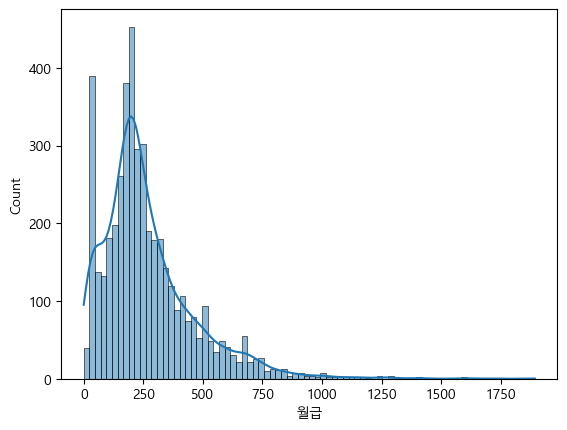

In [169]:
# 단일변수 - 연속형(숫자형) 시각화 : histplot, boxplot
sns.histplot(data=ex_one, x='월급', kde=True)

<Axes: xlabel='월급'>

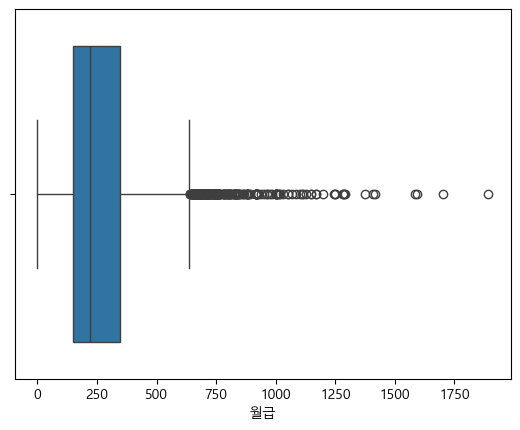

In [173]:
sns.boxplot(data=ex_one, x='월급')

### 분석 
* 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
    - 시각화
    - 데이터 요약

<Axes: xlabel='성별', ylabel='월급'>

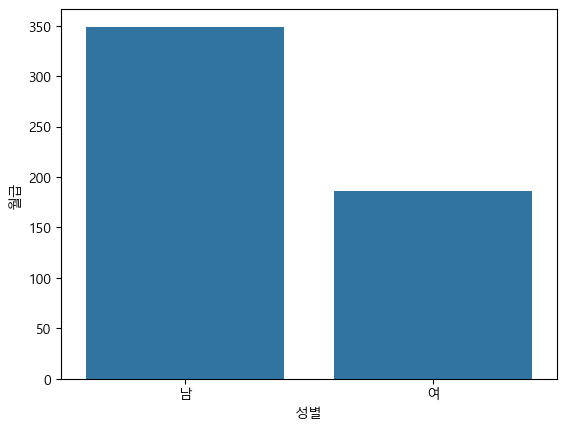

In [190]:
# 성별에 따른 월급차이
# sns.barplot(data=person_copy, x='성별', y='월급', errorbar=None, estimator=sum)

# 다 변수 - X(문자)/y(숫자) 시각화 : barplot
sns.barplot(data=ex_one, x='성별', y='월급', errorbar=None)

In [191]:
# 요약표
ex_one.groupby('성별')['월급'].mean()

성별
남    349.037571
여    186.293096
Name: 월급, dtype: float64

In [192]:
ex_one.groupby('성별')['월급'].mean().reset_index(name='월급평균')

,성별,월급평균
0,남,349.037571
1,여,186.293096


In [193]:
# 피벗 테이블 작성 
ex_one_tab=ex_one.pivot_table(
    index='성별',        # 행으로 사용할 열
    values='월급',       # 집계할 값
    aggfunc='mean',      # 집계 함수
    # columns=None,      # 열로 사용할 열
    # fill_value=0       # 결측값은 0으로 채움
)

ex_one_tab.rename(columns={'월급': '월급평균'}, inplace=True)
ex_one_tab

,월급평균
성별,
남,349.037571
여,186.293096


### 통계적 가설 검정
* 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?
    * 다변수: X 문자형 / Y 숫자형
    * 정규성 검정: 정규분포이다 / 정규분포아니다
    * 등분산성 검정: 등분산이다 / 등분산아니다
    * 가설: 남녀간 월급의 차이가 없다 / 남녀간 월급의 차이가 있다
    * 분석결과(Wilcoxon Test): 통계적으로 남여 월급의 차이가 있다 (p < 0.05)

In [196]:
# 정규성 검정 
stats.normaltest(ex_one['월급'])      

# 대립가설 참, 귀무가설 기각, 비 정규분포 / 0.0 < 0.05

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)

In [197]:
# 비정규성 >> 2집단 >> Wilcoxon Test
ex_one_m=ex_one[ex_one['성별']=='남']
ex_one_f=ex_one[ex_one['성별']=='여']

stats.ranksums(ex_one_m['월급'], ex_one_f['월급'])

# 대립가설 참, 귀무가설 기각, 남여 월급의 차이가 있다.
# 결론]시각화, 월급비교표, 윌콕슨(Wilcoxon Test)검정에 통해 남여 월급의 차이가 있다. 

RanksumsResult(statistic=30.80580065407471, pvalue=2.1912606852089194e-208)

## 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
* 분석에 활용할 변수(태어난연도, 월급)를 전처리
    - 이상치, 결측치 정제
    - 변수 값을 다루기 편하게 수정 - 태어난연도를 활용해 파생변수(나이) 만들기
* 변수 간 관계 분석
  - 그래프 : X(나이/순서형), Y(월급/숫자형) - LineChar : 시간에 따라 달라지는 데이터 / 장소, 시간
  - 데이터 요약표 (나이별 월급 평균표 만들기)
* 검증
  - X(연속형) / Y(연속형) : 상관분석
  - 정규성 검정 >> personr, spearmanr

### 나이 변수 검토 및 전처리

In [202]:
ex_two=ex_one.copy()

In [203]:
print("타입:", ex_two['태어난연도'].dtypes)             # 타입
print("사이즈:", ex_two['태어난연도'].size)             # 사이즈
print("결측치:", ex_two['태어난연도'].isna().sum())     # 결측치 확인

타입: float64
사이즈: 4534
결측치: 0


In [204]:
ex_two['태어난연도'].describe().astype(int)            #  기술통계량(이상치}, 코드북 - 년 단위, 모름/무응답(9999)

count    4534
mean     1971
std        15
min      1928
25%      1961
50%      1972
75%      1982
max      2001
Name: 태어난연도, dtype: int32

In [205]:
# 이상치 >> 결측 삭제 또는 대체 
# ex_two['태어난연도']=np.where(ex_two['태어난연도'] == 9999, np.nan, ex_two['태어난연도'])
# ex_two['태어난연도'].isna().sum()

In [206]:
# 파생변수 만들기 - 나이
# current_year=pd.Timestamp.today().year
ex_two['나이']=2019-person['태어난연도']+1          # 2019년에 조사가 진행된 데이터
ex_two['나이'].head()
ex_two['나이'].describe().astype(int)

count    4534
mean       48
std        15
min        19
25%        38
50%        48
75%        59
max        92
Name: 나이, dtype: int32

<Axes: xlabel='나이', ylabel='Count'>

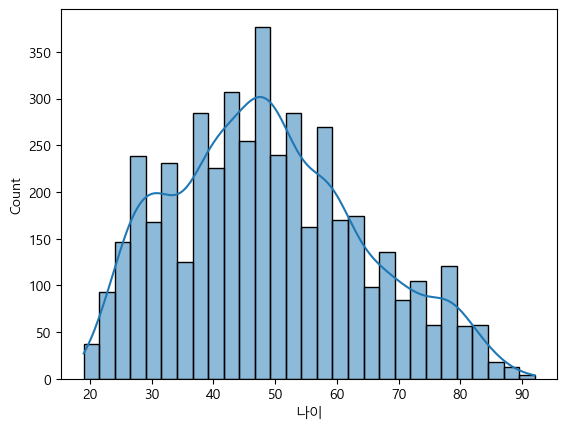

In [207]:
# 단일변수 - X(숫자형) 
sns.histplot(data=ex_two, x='나이', kde=True)

### 월급 변수 검토 및 전처리
* 성별에 따른 월급 차이에서 처리 5.2.2

In [209]:
print("타입:", ex_two['월급'].dtypes)             # 타입
print("사이즈:", ex_two['월급'].size)             # 사이즈
print("결측치:", ex_two['월급'].isna().sum())     # 결측치 확인

# ex_two['나이'].max(), ex_two['나이'].min()

타입: float64
사이즈: 4534
결측치: 0


### 분석 
* 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
    * 시각화
    * 데이터 요약

In [211]:
# 나이별 그룹화, 월급 평균 구하기
result=ex_two.groupby('나이')['월급'].mean().reset_index(name="나이월급평균")
result.head()

,나이,나이월급평균
0,19.0,162.000000
1,20.0,121.333333
2,21.0,136.400000
3,22.0,123.666667
4,23.0,179.676471


In [212]:
# 월급을 가장 많이 받는 나이
max_row=result[result['나이월급평균'] == result['나이월급평균'].max()]
max_row

,나이,나이월급평균
25,44.0,386.195876


<Axes: xlabel='나이', ylabel='월급'>

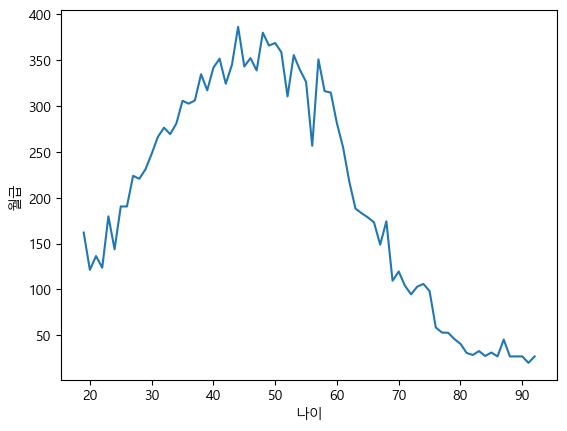

In [213]:
# 다변수 - X(숫자)/y(숫자) 시간에 따른 시각화 : lineplot
sns.lineplot(data=ex_two, x='나이', y='월급', errorbar=None)

### 통계적 가설 검정
* 나이와 월급의 관계 - 몇 살때 월급을 가장 많이 받을까?
    * 다변수: X 숫자형 / Y 숫자형
    * 상관 분석: 정규성(pearson) / 비정규성 (spearman)

In [215]:
ex_two_numeric=ex_two.select_dtypes(include='number')
round(ex_two_numeric.corr(), 2)

# 나이와 월급 -0.22 약한 상관 관계 / 나이가 증가할수록 월급이 약간 감소하는 경향

,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이
태어난연도,1.00,0.49,0.22,0.22,-0.43,-0.08,-1.00
혼인상태,0.49,1.00,0.10,-0.16,-0.11,-0.07,-0.49
종교,0.22,0.10,1.00,0.09,-0.06,0.03,-0.22
월급,0.22,-0.16,0.09,1.00,-0.35,-0.06,-0.22
직업코드,-0.43,-0.11,-0.06,-0.35,1.00,0.05,0.43
지역코드,-0.08,-0.07,0.03,-0.06,0.05,1.00,0.08
나이,-1.00,-0.49,-0.22,-0.22,0.43,0.08,1.00


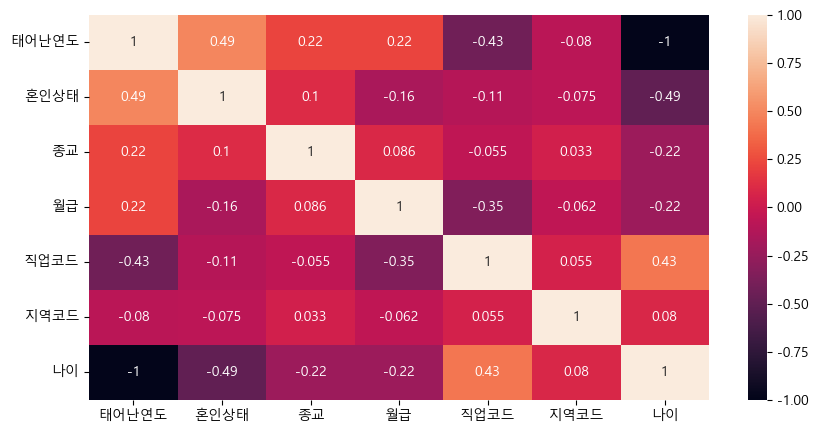

In [218]:
plt.figure(figsize=(10, 5))
sns.heatmap(ex_two_numeric.corr(), annot=True)
plt.show()

In [221]:
# 정규성 검정
# print(stats.normaltest(ex_two['나이']))
print(stats.normaltest(ex_two['월급']))

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)


In [222]:
# 비정규성 
# 귀무가설 : 나이와 월급의 상관성이 없다.
# 대립가설 : 나이와 월급의 상관성이 있다.

stats.spearmanr(ex_two['나이'], ex_two['월급'])  # 스피어맨 알

# 대립 참, 귀무설 기각, 나이와 월급의 상관성이 있다.

SignificanceResult(statistic=-0.2995003794137383, pvalue=1.2825223923244415e-94)

## 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많이 받을까?
- 분석에 활용할 변수(나이, 월급)를 전처리
    - 이상치, 결측치 정제
    - 변수 값을 다루기 편하게 수정 - 나이를 활용해 파생변수(연령대) 만들기
- 변수간 관계 분석
    - 데이터 요약표 (나이별 월급 평균표 만들기)
    - 그래프
- 검증
  - X(문자형) / Y(숫자형) >> 정규성 검증 >> 등분산 검증 >> 2집단, 3집단 이상

### 연령대 변수 검토 및 전처리
* 나이 >> 연령대
* 나이 : 나이와 월급의 관계에서 처리 5.3.2

In [227]:
ex_three=ex_two.copy()
ex_three.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,나이
2,남,1942.0,3.0,1.0,107.0,762.0,1.0,78.0
3,남,1962.0,1.0,1.0,192.0,855.0,1.0,58.0
7,여,1934.0,1.0,1.0,27.0,941.0,1.0,86.0
8,여,1940.0,2.0,1.0,27.0,999.0,2.0,80.0
14,남,1978.0,1.0,2.0,338.0,312.0,1.0,42.0


In [228]:
# 연령대 변수 만들기 - 초년(30세미만) / 중년(30 ~ 59세) / 노년(60세이상)
ex_three['연령대']=np.where(ex_three['나이'] < 30, '초년', 
                         np.where(ex_three['나이'] <= 59, '중년', '노년'))
ex_three['연령대'].value_counts().sort_index()

연령대
노년    1093
중년    2927
초년     514
Name: count, dtype: int64

<Axes: xlabel='연령대', ylabel='count'>

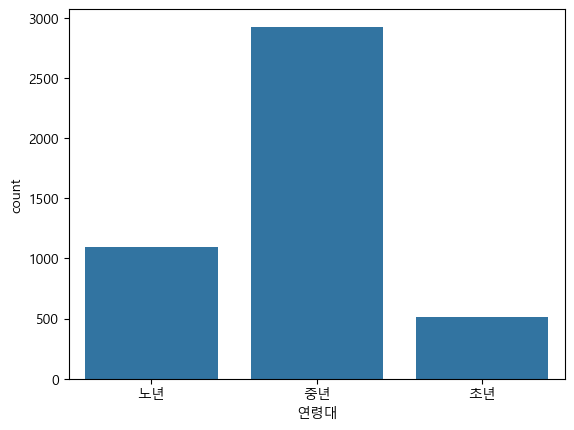

In [229]:
sns.countplot(data=ex_three, x='연령대')

### 월급 변수 검토
* 성별에 따른 월급 차이에서 처리 5.2.2

In [231]:
print("타입:", ex_three['월급'].dtypes)             # 타입
print("사이즈:", ex_three['월급'].size)             # 사이즈
print("결측치:", ex_three['월급'].isna().sum())     # 결측치 확인

타입: float64
사이즈: 4534
결측치: 0


### 분석 
* 연령대에 땨른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?
    * 시각화
    * 데이터 요약

<Axes: xlabel='연령대', ylabel='월급'>

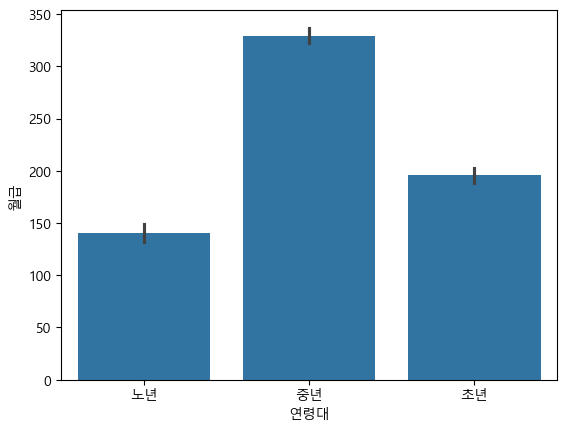

In [233]:
# 다변수 - X(문자)/y(숫자) 시각화 : barplot

sns.barplot(data=ex_three, x='연령대', y='월급')

In [235]:
result=ex_three.groupby('연령대')['월급'].mean().reset_index(name='연령대평균월급')
round(result, 0)

,연령대,연령대평균월급
0,노년,140.0
1,중년,329.0
2,초년,196.0


### 통계적 가설 검증
* 연령에 따른 월급 차이 - 어떤 연령의 따라 월급이 다를까?
    * 다변수: X 문자형 / Y 숫자형
    * 정규성 검정: 정규분포이다 / 정규분포아니다
    * 등분산성 검정: 등분산이다 / 등분산아니다
    * 가설: 연령대간 월급의 차이가 없다 / 연령대간  월급의 차이가 있다

In [239]:
stats.normaltest(ex_three['월급'])   # 정규성 검증 : 비정규

NormaltestResult(statistic=1657.4427188351524, pvalue=0.0)

In [240]:
# 비정규성 >> 3집단 >> Kruskal Willis Test

x=ex_three[ex_three['연령대']=='노년']
y=ex_three[ex_three['연령대']=='중년']
z=ex_three[ex_three['연령대']=='초년']

stats.kruskal(x['월급'], y['월급'], z['월급'])

# 대립가설 참, 귀무가설 기각, 연령대별 월급의 차이가 있다.
# 결론]시각화, 월급비교표(중년층), 크루스칼(Kruskal Willis Test)검정에 통해 연령대별 월급의 차이가 있다. 

KruskalResult(statistic=1154.8545662293197, pvalue=1.6846793127448966e-251)

## 연령대별 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
### 변수 검토 및 전처리
* 연령대(5.4.1), 성별(5.2.1), 월급(5.2.2) 전처리 참조

In [244]:
ex_four=ex_three.copy()
ex_four.head()
ex_four.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 2 to 14416
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4534 non-null   object 
 1   태어난연도   4534 non-null   float64
 2   혼인상태    4534 non-null   float64
 3   종교      4534 non-null   float64
 4   월급      4534 non-null   float64
 5   직업코드    4534 non-null   float64
 6   지역코드    4534 non-null   float64
 7   나이      4534 non-null   float64
 8   연령대     4534 non-null   object 
dtypes: float64(7), object(2)
memory usage: 354.2+ KB


### 분석 결과
* 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?
    * 시각화
    * 데이터 요약

<Axes: xlabel='연령대', ylabel='월급'>

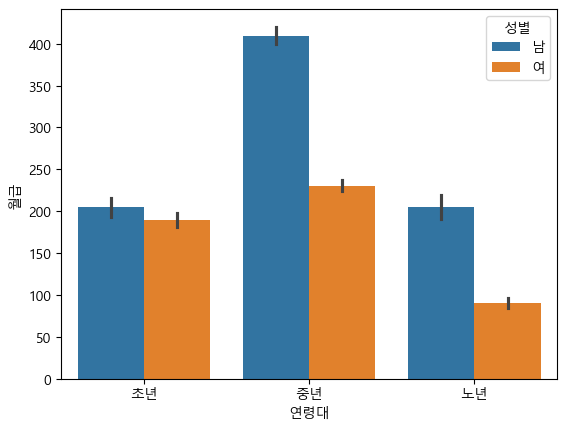

In [248]:
# 시각화 : x(문자), y(숫자) / barplat 
sns.barplot(data=ex_four, x='연령대', y='월급', hue='성별',  order=['초년', '중년', '노년'])

In [266]:
# 데이터 요약
result=ex_four.groupby(['연령대', '성별'])['월급'].mean().reset_index(name="월급평균")
result.round(0)

,연령대,성별,월급평균
0,노년,남,205.0
1,노년,여,90.0
2,중년,남,410.0
3,중년,여,230.0
4,초년,남,205.0
5,초년,여,190.0


### 통계적 가설 검증
* 성별 월급 차이는 연령대별로 없다 / 있다.
* 다변수: X 문자형 / Y 숫자형
* 정규성 검정: 월급 >> 비정규성 >> 3집단 이상 Kruskal Wills Test (kruskal())

In [268]:
m=ex_four[ex_four['성별']=='남']
f=ex_one[ex_four['성별']=='여']

o=ex_four[ex_four['연령대']=='노년']
y=ex_four[ex_four['연령대']=='중년']
b=ex_four[ex_four['연령대']=='초년']

stats.kruskal(m['월급'], f['월급'], o['월급'], y['월급'], b['월급'])

# 대립 가설 참, 귀무가설 기각, 성별 월급차이는 연령대별로 차이가 있다. 즉 다르다.

KruskalResult(statistic=2104.3728897890423, pvalue=0.0)

In [371]:
# 중간에 한번 저장
# ex_four.head()
# ex_four.to_csv(r'D:\Edu\Machine Learning\workspace\PythonBasic\Data\pandas\project\ex_four.csv', index=False)

## 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 직업 변수 검토 및 전처리
* 직업코드 변수와 코드북의 직업분류코드 병합

In [497]:
person=pd.read_csv('./Data/pandas/project/person.csv')
ex_five=person.copy()
ex_five.shape

(14418, 7)

In [499]:
ex_five.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
dtypes: float64(7)
memory usage: 788.6 KB


In [501]:
ex_five['직업코드'].value_counts()

직업코드
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

#### 코드북의 직업분류코드

In [503]:
# 전처리 - Koweps_Codebook_2019.xlsx
job_data=pd.read_excel('./Data/pandas/project/Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
job_data.shape      # (156, 2)
job_data.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [505]:
job_list=job_data.rename(columns={'code_job' : '직업코드', 'job' : '직무내용'})
job_list.head()

# 저장 : 기본적으로 인덱스(index) 포함, index='인덱스를 포함하지 않고'
# job_list.to_excel(r'C:\Users\JMH\Desktop\KimPro\workspace\PythonBasic\Data\pands\project\joblist.xlsx', index=False)

,직업코드,직무내용
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


#### 한국복지패널과 직업분류코드 병합

In [519]:
# left join : 왼쪽 정보를 기준으로 결합한다. (왼쪽 정보가 조건에 부합하지 않아도 모두 결합)
ex_five_merage=ex_five.merge(job_list, on='직업코드', how='inner')   # how='inner' 차이는 없다. 
ex_five_merage.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용
0,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공
1,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원
2,2.0,1934.0,1.0,1.0,27.0,941.0,1.0,청소원 및 환경미화원
3,2.0,1940.0,2.0,1.0,27.0,999.0,2.0,기타 서비스 관련 단순 종사자
4,1.0,1978.0,1.0,2.0,338.0,312.0,1.0,경영 관련 사무원


### 월급 변수 검토 및 전처리

In [531]:
ex_five_merage.dropna(inplace=True)
ex_five_merage.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4534 entries, 0 to 6877
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      4534 non-null   float64
 1   태어난연도   4534 non-null   float64
 2   혼인상태    4534 non-null   float64
 3   종교      4534 non-null   float64
 4   월급      4534 non-null   float64
 5   직업코드    4534 non-null   float64
 6   지역코드    4534 non-null   float64
 7   직무내용    4534 non-null   object 
dtypes: float64(7), object(1)
memory usage: 318.8+ KB


### 분석 
* 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?
    * 시각화
    * 데이터 요약 - 직업별 월급 평균표

<Axes: xlabel='직무내용', ylabel='월급'>

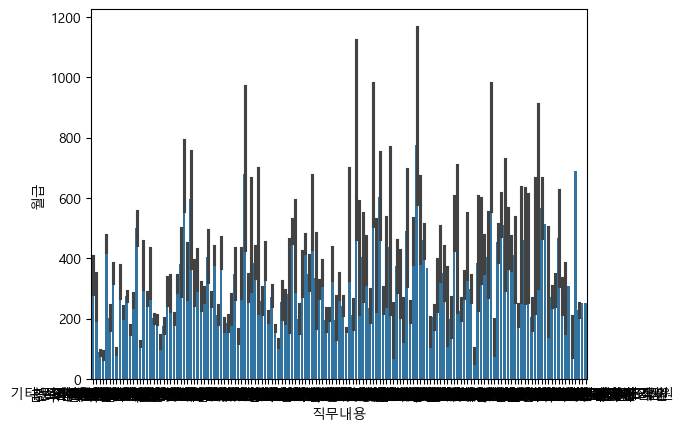

In [534]:
# 시각화 - X(문자형), Y(숫자형) / barplot
sns.barplot(data=ex_five_merage, x='직무내용', y='월급')

In [536]:
# 직업별 월급 평균표
result=ex_five_merage.groupby('직무내용')['월급'].mean().reset_index(name='직업별평균월급')
result

,직무내용,직업별평균월급
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [538]:
# 상위 10 추출
top10=result.sort_values('직업별평균월급', ascending=False).head(10)
top10

,직무내용,직업별평균월급
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


<Axes: xlabel='직업별평균월급', ylabel='직무내용'>

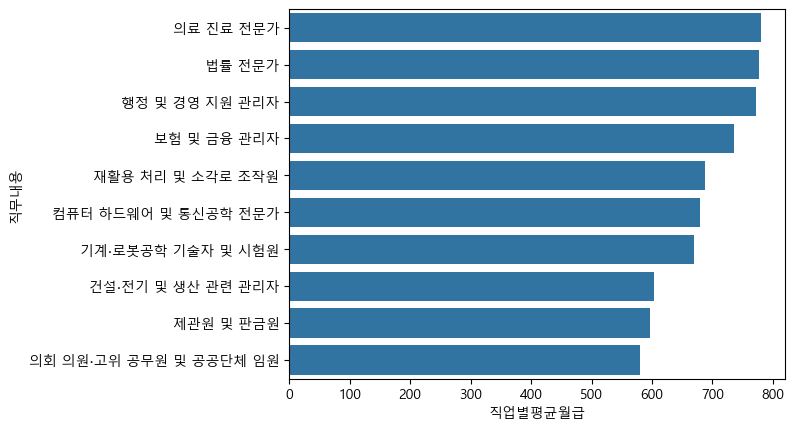

In [462]:
sns.barplot(data=top10, y='직무내용', x='직업별평균월급')

In [540]:
# 하위 10 추출
bottom10=result.sort_values('직업별평균월급').head(10)
bottom10

,직무내용,직업별평균월급
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


<Axes: xlabel='직업별평균월급', ylabel='직무내용'>

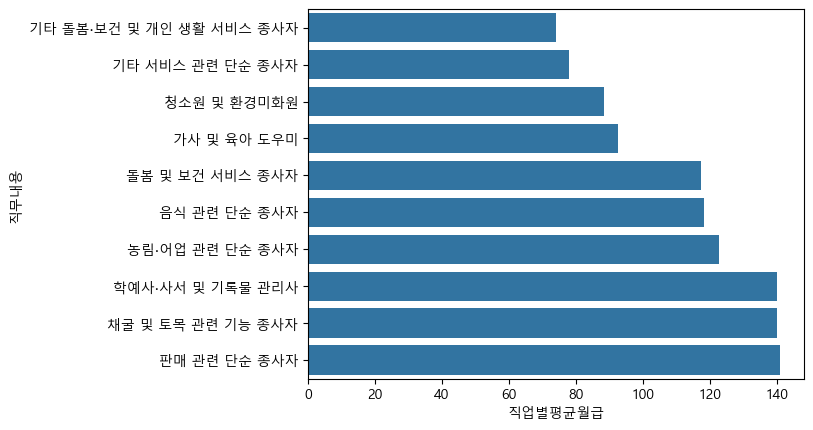

In [464]:
sns.barplot(data=bottom10, y='직무내용', x='직업별평균월급')

### 통계적 가설 검증
* 직업별 월급 차이가 없다 / 있다.
* 다변수: X 문자형 / Y 숫자형
* 정규성 검정: 월급 >> 비정규성 >> 3집단 이상 Kruskal Wills Test (kruskal())

In [542]:
job_groups = []

# ex_five_merage 데이터에서 고유한 직무내용을 반복
for job in ex_five_merage['직무내용'].unique():
    
    # 각 직무에 해당하는 월급 데이터를 필터링하여 리스트에 추가
    job_salary=ex_five_merage[ex_five_merage['직무내용']==job]['월급']

    # print(job, job_salary)
    job_groups.append(job_salary)

len(job_groups)     # 147개

# Kruskal-Wallis H 검정
stats.kruskal(*job_groups)    # * 대립가설 참, 귀무가설 기각, 직업별 월급 차이가 있다. 

# '*' 연산자는 리스트나 튜플과 같은 반복 가능한(iterable) 객체를 개별 인자로 "풀어" 전달하는 데 사용 (PPT 참조)

KruskalResult(statistic=2504.604573255475, pvalue=0.0)

## 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
### 전처리 
* 성별, 직업코드, 직무내용

In [550]:
ex_six_imsi=ex_five_merage[['성별', '직업코드', '직무내용']]
ex_six_imsi.head(2)

,성별,직업코드,직무내용
0,1.0,762.0,전기공
1,1.0,855.0,금속기계 부품 조립원


In [552]:
ex_six=ex_six_imsi.copy()
ex_six['성별']=np.where(ex_six['성별']==1.0, '남', '여')
ex_six['성별'].value_counts()

성별
남    2289
여    2245
Name: count, dtype: int64

In [554]:
# 남성
male=ex_six[ex_six['성별']=='남']
male_count=male['직무내용'].value_counts().head(10)
male_count

직무내용
경영 관련 사무원           212
자동차 운전원             114
청소원 및 환경미화원          92
영업 종사자               91
건물 관리원 및 검표원         78
행정 사무원               74
제조 관련 단순 종사자         69
매장 판매 종사자            60
전기∙전자기기 설치 및 수리원     52
배달원                  52
Name: count, dtype: int64

Text(0.5, 0, '인원수')

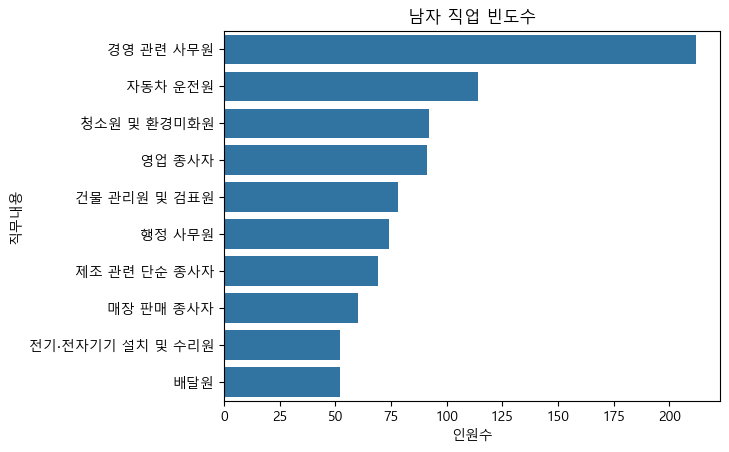

In [556]:
sns.countplot(data=male, y='직무내용', order=male_count.index)
plt.title("남자 직업 빈도수")
plt.xlabel("인원수")

In [558]:
# 여성
female=ex_six[ex_six['성별']=='여']
female_count=female['직무내용'].value_counts().head(10)
female_count

직무내용
청소원 및 환경미화원         261
회계 및 경리 사무원         151
돌봄 및 보건 서비스 종사자     151
제조 관련 단순 종사자        128
매장 판매 종사자           106
음식 관련 단순 종사자        101
기타 서비스 관련 단순 종사자     83
고객 상담 및 기타 사무원       74
조리사                  72
간호사                  70
Name: count, dtype: int64

Text(0.5, 0, '인원수')

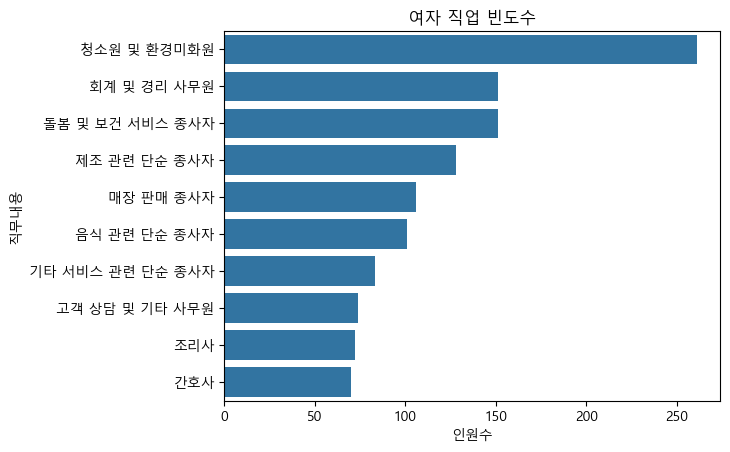

In [562]:
sns.countplot(data=female, y='직무내용', order=female_count.index)
plt.title("여자 직업 빈도수")
plt.xlabel("인원수")

### 분석 
* 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?
    - 시각화
    - 데이터 요약표 - 남/녀 직업별 빈도수

<Axes: title={'center': '남녀 직업 빈도수'}, xlabel='인원수', ylabel='직무내용'>

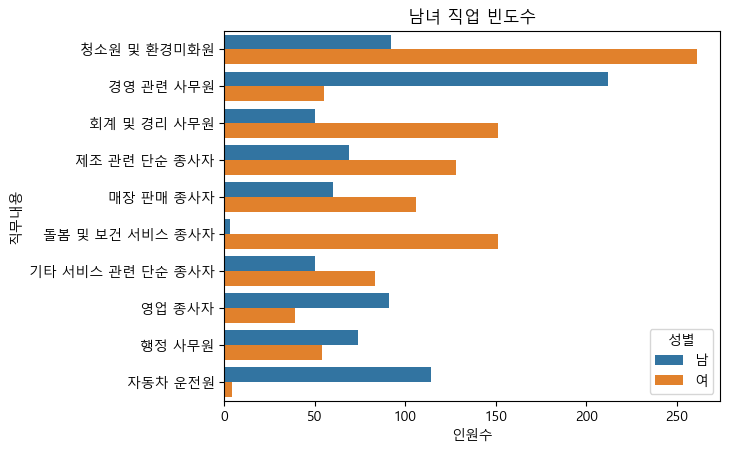

In [564]:
# 시각화
top=ex_six['직무내용'].value_counts().head(10)    # 시리즈로 반환

plt.title("남녀 직업 빈도수")
plt.xlabel("인원수")
sns.countplot(data=ex_six, y='직무내용', hue='성별', order=top.index)

In [566]:
# 여성
# m_result=male.groupby("직무내용")['성별'].count().reset_index(name='남성인원수')
# m_result.sort_values("남성인원수", ascending=False).head(10)

# # 남성 
# f_result=female.groupby("직무내용")["성별"].count().reset_index(name="여성인원수")
# f_result.sort_values('여성인원수', ascending=False).head(10)

In [568]:
# 성별 요약표 - 직무내용 그룹화 후 인원수
result=ex_six.groupby(['직무내용', '성별'])['성별'].count().reset_index(name='인원수')
result.sort_values('인원수', ascending=False).head(10)

,직무내용,성별,인원수
204,청소원 및 환경미화원,여,261
17,경영 관련 사무원,남,212
235,회계 및 경리 사무원,여,151
70,돌봄 및 보건 서비스 종사자,여,151
194,제조 관련 단순 종사자,여,128
171,자동차 운전원,남,114
75,매장 판매 종사자,여,106
160,음식 관련 단순 종사자,여,101
203,청소원 및 환경미화원,남,92
146,영업 종사자,남,91


### 통계적 가설 검증
* 성별에 따라 직무의 차이가 없다 / 있다 (연관성 검정)
* 또는 성별에 상관없이 직업의 분포가 동일하다 / 동일하지 않다.
* 다변수: X 문자형 / Y 문자형
* Chi Square Test

In [570]:
# Contingency Table : 범주형 데이터의 항목 빈도수 테이블
ex_six_crosstab=pd.crosstab(ex_six['직무내용'], ex_six['성별'])
ex_six_crosstab

성별,남,여
직무내용,,
가사 및 육아 도우미,1,67
간호사,3,70
감정∙기술영업및중개관련종사자,14,4
건물 관리원 및 검표원,78,2
건설 및 광업 단순 종사자,35,5
...,...,...
화학∙고무 및 플라스틱 제품 생산기 조작원,7,0
화학공학 기술자 및 시험원,6,0
환경∙청소 및 경비 관련 관리자,8,2


In [572]:
c_result=stats.chi2_contingency(ex_six_crosstab)
c_result.pvalue, c_result.statistic     # 내용이 너무 많아서 원하는 값만 출력

# 대립 가설 참, 귀무가설 기각, 성별에 따른 직무의 차이가 있다 / 즉, 연관성이 있다. 서로 의존적이다.

(0.0, 1979.0205094555938)

## 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?
### 데이타 파일 가져오기

In [574]:
# person 데이터 파일 가져오기 
person=pd.read_csv('./Data/pandas/project/person.csv')
person.shape

(14418, 7)

In [576]:
# joblist 데이터 파일 가져오기 
job_list=pd.read_excel('./Data/pandas/project/joblist.xlsx')
job_list.shape

(156, 2)

In [586]:
# 병합 
pj_merage=person.merge(job_list, on='직업코드', how='left')   
pj_merage.shape

(14418, 8)

In [588]:
pj_merage.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,NaN


In [590]:
ex_seven=pj_merage.copy()
ex_seven.head()   

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,NaN


In [592]:
ex_seven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      14418 non-null  float64
 1   태어난연도   14418 non-null  float64
 2   혼인상태    14418 non-null  float64
 3   종교      14418 non-null  float64
 4   월급      4534 non-null   float64
 5   직업코드    6878 non-null   float64
 6   지역코드    14418 non-null  float64
 7   직무내용    6878 non-null   object 
dtypes: float64(7), object(1)
memory usage: 901.3+ KB


### 종교 변수 검토 및 전처리
* 종교변수 전처리 - 종교 있음(1), 없음(2), 모름/무응답(9)

In [594]:
ex_seven['종교'].value_counts()    # 종교 있음(1), 없음(2), 모름/무응답(9)

종교
2.0    7815
1.0    6603
Name: count, dtype: int64

In [596]:
ex_seven['종교유무']=np.where(ex_seven['종교']==1, '유', '무')
# ex_seven['종교유무']=np.where(ex_seven['종교']==1, '유', 
#                             np.where(ex_seven['종교']==2, '무', '없음'))
ex_seven['종교유무'].value_counts()

종교유무
무    7815
유    6603
Name: count, dtype: int64

<Axes: xlabel='종교유무', ylabel='count'>

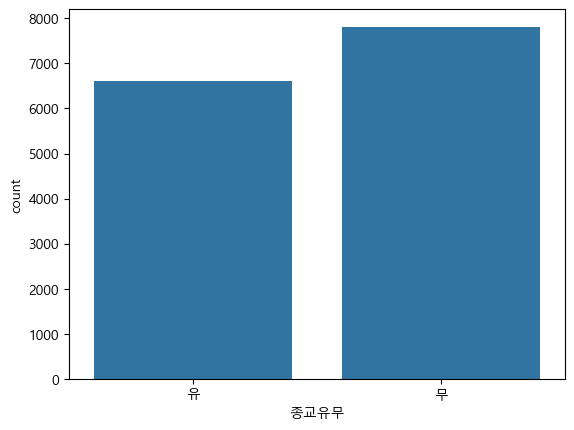

In [22]:
sns.countplot(data=ex_seven, x='종교유무')

### 혼인 상태 변수 검토 및 전처리
* 코드북 확인 : 0 ~ 6 존재
* 파생변수 만들기 - 유배우(1), 이혼(3), 그외 기타(사별, 별거, 미혼, 18세 미만, 기타)

In [598]:
ex_seven['혼인상태'].value_counts()

혼인상태
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [600]:
# 코드북 확인 : 0 ~ 6 존재
# 파생변수 만들기 - 유배우(1), 이혼(3), 그외 기타(사별, 별거, 미혼, 18세 미만, 기타)

ex_seven['혼인타입']=np.where(ex_seven['혼인상태']==1, '유배우',
                              np.where(ex_seven['혼인상태']==3, '이혼', '기타'))
ex_seven['혼인타입'].value_counts()

혼인타입
유배우    7190
기타     6539
이혼      689
Name: count, dtype: int64

In [602]:
rel_df=ex_seven[ex_seven['혼인타입'] !='기타']
rel_df.shape     # (3098, 11)

rel_df['혼인타입'].value_counts()

혼인타입
유배우    7190
이혼      689
Name: count, dtype: int64

<Axes: xlabel='혼인타입', ylabel='count'>

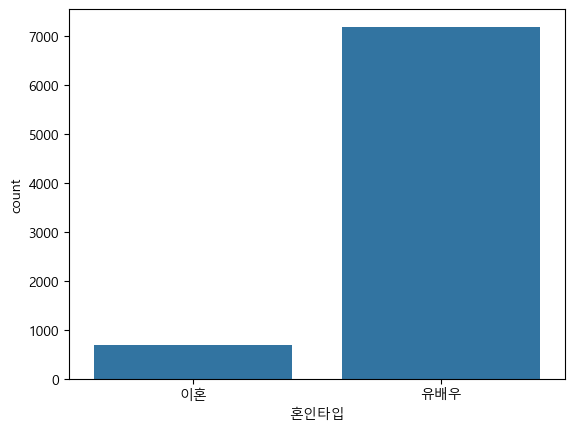

In [604]:
sns.countplot(data=rel_df, x='혼인타입')

### 분석 결과
* 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까?
  - 시각화
  - 데이터 요약표 - 남/녀 직업별 빈도수

<Axes: xlabel='혼인타입', ylabel='count'>

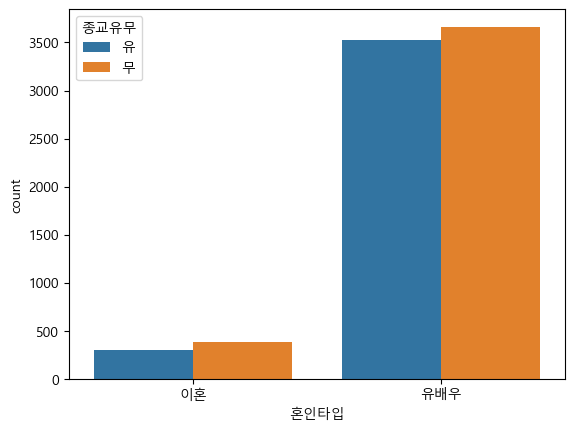

In [607]:
sns.countplot(data=rel_df, x='혼인타입', hue='종교유무')

In [609]:
# 데이터 요약표 - 종교별 그룹화 후 혼인타입으로 비율 구하기
result=rel_df.groupby(['종교유무', '혼인타입'])['혼인타입'].count().reset_index(name="인원수")
result['인원수 백분율']=round(result['인원수'] /  result['인원수'].sum() * 100, 1)
result

,종교유무,혼인타입,인원수,인원수 백분율
0,무,유배우,3660,46.5
1,무,이혼,384,4.9
2,유,유배우,3530,44.8
3,유,이혼,305,3.9


In [611]:
result[result['혼인타입'] =='이혼']

,종교유무,혼인타입,인원수,인원수 백분율
1,무,이혼,384,4.9
3,유,이혼,305,3.9


### 통계적 가설 검정
* 종교 유무에 따른 이혼율 - 종교가 있으면 이혼을 덜 할까? (종교와 이혼율의 연관성이 있을까?)
* 종교와 이혼율의 관계 있을까?
    * 다변수: X문자형 / Y문자형
    * Chi^2 Test
* 가설: 연관성이 없다(독립) / 연관성이 있다.

In [614]:
# Contingency Table : 범주형 데이터의 항목 빈도수 테이블
ex_seven_crosstab=pd.crosstab(rel_df['혼인타입'], rel_df['종교유무'])
ex_seven_crosstab

종교유무,무,유
혼인타입,,
유배우,3660,3530
이혼,384,305


In [616]:
stats.chi2_contingency(ex_seven_crosstab)

# 대림가설 참, 귀무가설 기각, 종교와 이혼율은 연관성이 있다

Chi2ContingencyResult(statistic=5.6769927793878825, pvalue=0.01718880447200066, dof=1, expected_freq=array([[3690.36172103, 3499.63827897],
       [ 353.63827897,  335.36172103]]))

## 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?
### 연령대 변수 검토 및 전처리

In [618]:
ex_eight=ex_seven.copy()
ex_eight.head()

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,종교유무,혼인타입
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN,유,기타
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN,무,기타
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,유,이혼
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원,유,유배우
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,NaN,유,유배우


In [620]:
# 파생변수 만들기 - 나이
ex_eight['나이']=2019-ex_eight['태어난연도']+1

# 연령대 변수 만들기
ex_eight['연령대']=np.where(ex_eight['나이'] < 30, '초년층', 
                         np.where(ex_eight['나이'] <=59, '중년층', '노년층'))
ex_eight['연령대'].value_counts().sort_index()

연령대
노년층    5955
중년층    4963
초년층    3500
Name: count, dtype: int64

In [622]:
ex_eight.head(3)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,종교유무,혼인타입,나이,연령대
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN,유,기타,75.0,노년층
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN,무,기타,72.0,노년층
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,유,이혼,78.0,노년층


### 지역 변수 검토 및 전처리

In [624]:
ex_eight['지역코드'].value_counts()

지역코드
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

#### 지역 코드 목록 만들기

In [627]:
# 지역 코드 목록 만들기  리전
list_region=pd.DataFrame({'지역코드':[1, 2, 3, 4, 5, 6, 7],
                           '지역':['서울',
                                   '수도권(인천/경기)',
                                   '부산/경남/울산',
                                   '대구/경북',
                                   '대전/충남',
                                   '강원/충북',
                                   '광주/전남/전북/제주']})
list_region

,지역코드,지역
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주


#### 병합 - 지역코드, 지역명 

In [629]:
#  병합 : 지역명 변수 추가
ex_eight_merge=ex_eight.merge(list_region, on='지역코드', how='left')
ex_eight_merge.head(3)

,성별,태어난연도,혼인상태,종교,월급,직업코드,지역코드,직무내용,종교유무,혼인타입,나이,연령대,지역
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,NaN,유,기타,75.0,노년층,서울
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,NaN,무,기타,72.0,노년층,서울
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,유,이혼,78.0,노년층,서울


### 분석 
* 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?
  - 시각화
  - 데이터 요약표 - 지역별 연령대 비율

<Axes: xlabel='count', ylabel='지역'>

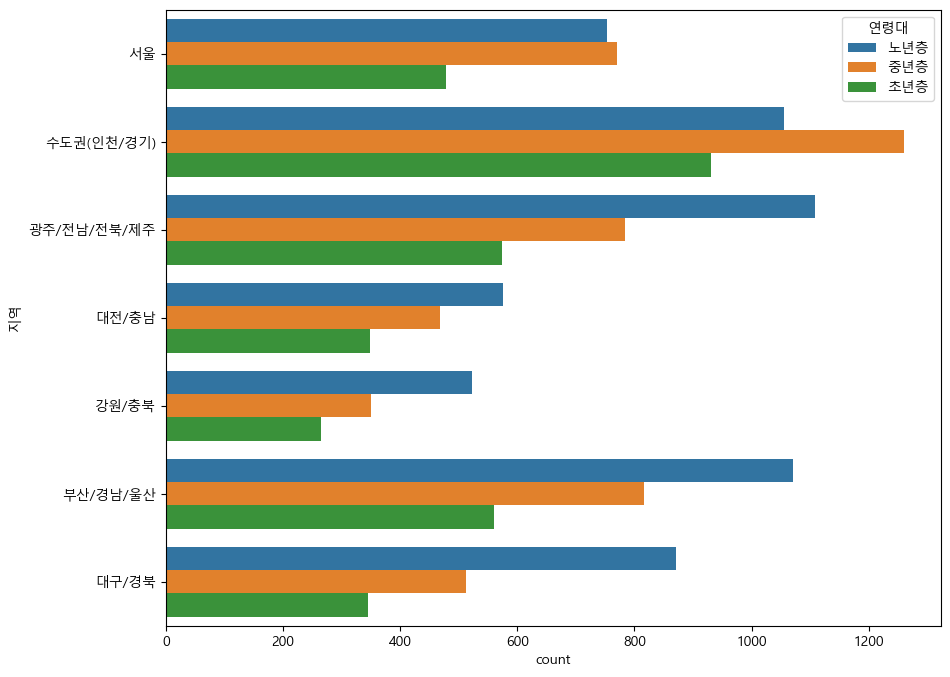

In [632]:
plt.figure(figsize=(10, 8))
sns.countplot(data=ex_eight_merge, y='지역', hue='연령대')

In [634]:
result=ex_eight_merge.groupby('지역')['연령대'].value_counts(normalize=True).reset_index(name="인원수")
result['인원수_백분율']=round(result['인원수'] * 100, 1)
# result

# groupby('지역'): 지역별로 데이터를 그룹화.
# value_counts(normalize=True): 각 그룹 내에서 연령대 값의 비율을 계산.
# reset_index(name="인원수"): 그룹화된 결과를 원래의 데이터프레임 형태로 되돌리고, 새로운 컬럼 이름을 "인원수"로 지정.

In [638]:
# 피벗
# result_df=result[['지역', '연령대', '인원수_백분율']]
pivot_df=result.pivot(index='지역', columns='연령대', values='인원수_백분율')
pivot_df

연령대,노년층,중년층,초년층
지역,,,
강원/충북,45.9,30.9,23.2
광주/전남/전북/제주,44.9,31.8,23.3
대구/경북,50.4,29.6,20.0
대전/충남,41.3,33.6,25.0
부산/경남/울산,43.8,33.4,22.9
서울,37.6,38.5,23.9
수도권(인천/경기),32.5,38.8,28.7


<Axes: ylabel='지역'>

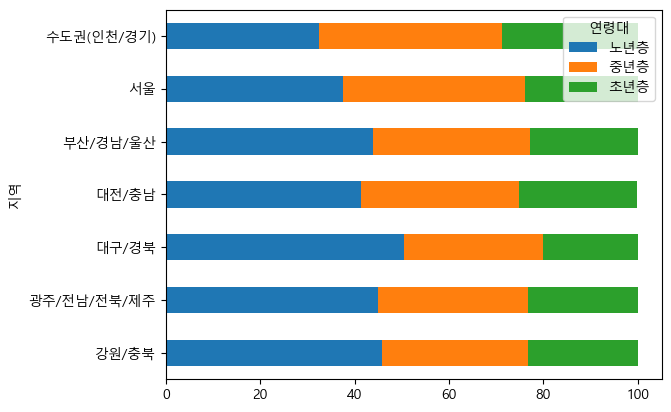

In [640]:
# 가로 막대 그래프
# pivot_df.plot.barh
pivot_df.plot.barh(stacked=True)   # True : 여러 데이터가 막대 위에 누적

In [642]:
# 연령대 순서 바꾸기
reorder_df=pivot_df.sort_values('노년층')[['초년층', '중년층', '노년층']]
reorder_df

연령대,초년층,중년층,노년층
지역,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='지역'>

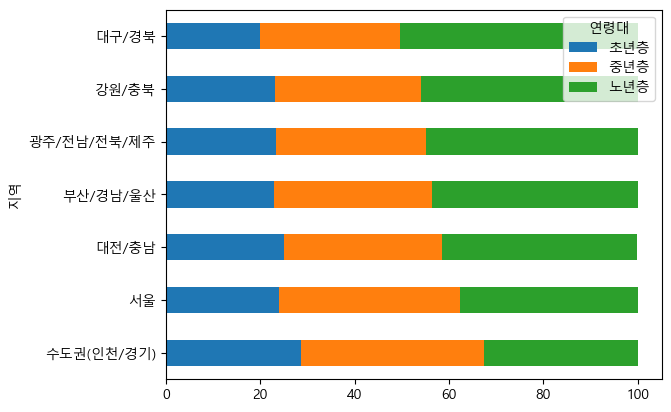

In [644]:
# 가로 막대 그래프
reorder_df.plot.barh(stacked=True)

### 통계적 가설 검정

In [646]:
# 귀무가설(H₀): 지역별 연령대 분포는 서로 독립적이다.
# 대립가설(H₁): 지역별 연령대 분포는 서로 독립적이지 않다.

ex_eight_crosstab=pd.crosstab(ex_eight_merge['지역'], ex_eight_merge['연령대'], normalize='all') * 100
ex_eight_crosstab                                                       # 전체 데이터의 총합을 기준으로 비율 (백분율_

연령대,노년층,중년층,초년층
지역,,,
강원/충북,3.620474,2.434457,1.831045
광주/전남/전북/제주,7.684838,5.437647,3.981135
대구/경북,6.041060,3.551117,2.392842
대전/충남,3.988070,3.245943,2.413650
부산/경남/울산,7.428215,5.666528,3.884034
서울,5.222638,5.347482,3.315300
수도권(인천/경기),7.317242,8.739076,6.457206


In [648]:
stats.chi2_contingency(ex_eight_crosstab)

# 귀무가설 참, 귀무가설 기각 실패, 연령대별 지역 거주는 연관성이 없다.

Chi2ContingencyResult(statistic=1.471450362300088, pvalue=0.999882251090635, dof=12, expected_freq=array([[3.25710822, 2.71453032, 1.91433732],
       [7.06422943, 5.88745099, 4.15194005],
       [4.95011697, 4.1255131 , 2.90938865],
       [3.98472958, 3.32094255, 2.34199052],
       [7.01266571, 5.8444769 , 4.12163392],
       [5.73503135, 4.77967433, 3.37071532],
       [9.29865723, 7.74966177, 5.46520576]]))